### Import Dependencies

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('/content/language.csv')

In [3]:
df

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
5224,la revue mensuelle maître guillaume a été fond...,French
5225,โรงเรียนดอนเมืองทหารอากาศบำรุง อังกฤษ donmuang...,Thai
5226,după absolvirea facultății se angajează în cad...,Romanian
5227,كانت ولادة الجاحظ في خلافة المهدي ثالث الخلفاء...,Arabic


In [43]:
df.shape

(5228, 2)

In [4]:
df['language'].value_counts()

,count
language,
Russian,258
Japanese,254
Persian,251
Tamil,247
Arabic,246
Indonesian,240
Turkish,240
Pushto,240
Portugese,240


<Axes: xlabel='language'>

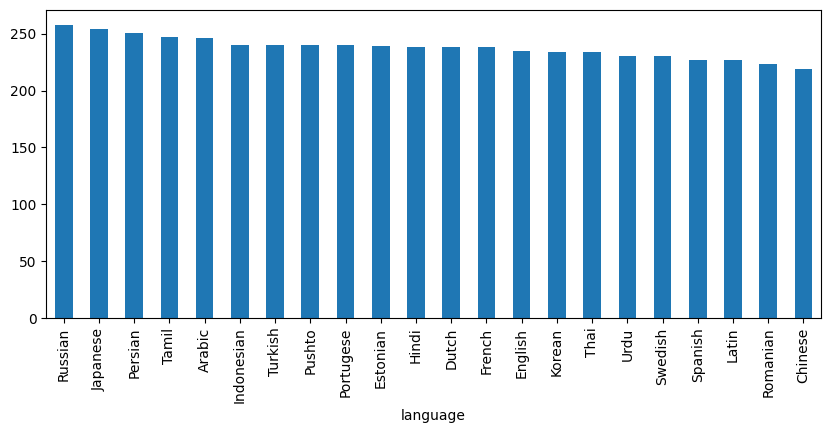

In [6]:
plt.figure(figsize=(10,4))
df['language'].value_counts().plot(kind='bar')

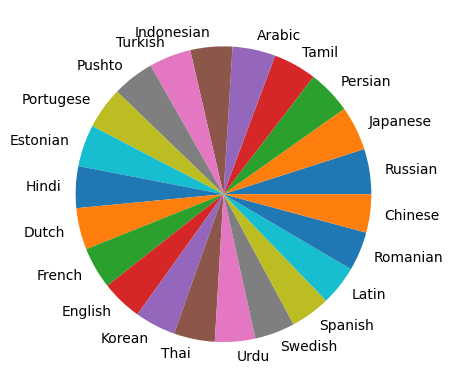

In [9]:
plt.pie(df['language'].value_counts(), labels=df['language'].value_counts().index)
plt.show()

In [14]:
df.isna().sum()

,0
Text,0
language,1


In [15]:
df.dropna(inplace=True)

In [16]:
df.isna().sum()

,0
Text,0
language,0


In [18]:
X = np.array(df['Text'])
y = np.array(df['language'])

In [19]:
X

array(['klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald',
       'sebes joseph pereira thomas  på eng the jesuits and the sino-russian treaty of nerchinsk  the diary of thomas pereira bibliotheca instituti historici s i --   rome libris ',
       'ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร และเขตบางคอแหลม',
       ...,
       'โรงเรียนดอนเมืองทหารอากาศบำรุง อังกฤษ donmuang thaharnagardbumroong school อักษรย่อ ดม dm เป็นโรงเรียนมัธยมศึกษา เปิดศึกษาในชั้นมัธยมศึกษาปีที่  -  สังกัด สำนักงานคณะกรรมการการศึกษาขั้นพ

In [20]:
y

array(['Estonian', 'Swedish', 'Thai', ..., 'Thai', 'Romanian', 'Arabic'],
      dtype=object)

In [22]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [29]:
model.score(x_test, y_test)

0.9851513420902341


0.9438006952491309

In [62]:
query = input("Enter a Text: ").lower()
data = cv.transform([query]).toarray()
output = model.predict(data)
print(output)

Enter a Text: what is your name
['English']
